In [39]:
%matplotlib inline 
import matplotlib.pyplot as plt

import os
os.environ["KERAS_BACKEND"] = "theano"
os.environ["THEANO_FLAGS"] = "device=cuda,floatX=float32"
import pickle
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import normalize
from pprint import pprint


In [43]:
# 28x28 images of hand-written digits 0-9
mnist = tf.keras.datasets.mnist 

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [44]:
# reshaping image array to function well with the keras api
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')

# normalizing image - 0..1
x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D,Reshape, MaxPooling2D, Dropout

model = Sequential()
model.add( Conv2D(256, (3,3), input_shape=input_shape) ) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))    # initial layer
# model.add(Dense(128, activation=tf.nn.relu))    # middle layer
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))  # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 256)       2560      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 43264)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               5537920   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 5,541,770
Trainable params: 5,541,770
Non-trainable params: 0
____________________________________________

In [47]:
model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 24s 14ms/step - loss: 0.2245 - accuracy: 0.9316 - val_loss: 0.0969 - val_accuracy: 0.9704
Epoch 2/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0948 - accuracy: 0.9705 - val_loss: 0.0820 - val_accuracy: 0.9743
Epoch 3/10
1500/1500 [==============================] - 20s 14ms/step - loss: 0.0680 - accuracy: 0.9775 - val_loss: 0.0751 - val_accuracy: 0.9783
Epoch 4/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0535 - accuracy: 0.9819 - val_loss: 0.0745 - val_accuracy: 0.9811
Epoch 5/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0468 - accuracy: 0.9853 - val_loss: 0.0835 - val_accuracy: 0.9793
Epoch 6/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0405 - accuracy: 0.9868 - val_loss: 0.0877 - val_accuracy: 0.9777
Epoch 7/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0353 - accuracy: 0.9887 - val_loss: 0.0899 -

In [48]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.1037 - accuracy: 0.9772
0.10372116416692734 0.9771999716758728


In [52]:
import cv2

def prepare(path):
    IMG_SIZE = 28
    img_array = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    f_img = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    return normalize(f_img, axis=1)

In [65]:
# Trying to import outside sources and use model for predictions
# currently only works for sources from current data
number = 'images/number_7.png'
num_img = prepare(number)
print(x_test[0][0][0])
print(num_img)

probs = model.predict(num_img)
preds = np.argmax(probs, axis=1)
# print(probs)

[0.]
[[[[0.18898224]
   [0.20100193]
   [0.18898224]
   [0.19239399]
   [0.18898224]
   [0.18898224]
   [0.18898224]
   [0.18898224]
   [0.19543616]
   [0.19642158]
   [0.19607798]
   [0.19625386]
   [0.20232782]
   [0.20320009]
   [0.20595011]
   [0.20547145]
   [0.21009783]
   [0.20325095]
   [0.20430384]
   [0.20494962]
   [0.19975991]
   [0.19480053]
   [0.18898224]
   [0.18898224]
   [0.18898224]
   [0.19029453]
   [0.18898224]
   [0.18898224]]

  [[0.18898224]
   [0.20100193]
   [0.18898224]
   [0.19239399]
   [0.18898224]
   [0.18898224]
   [0.18898224]
   [0.18898224]
   [0.19543616]
   [0.19642158]
   [0.19607798]
   [0.19625386]
   [0.20232782]
   [0.20320009]
   [0.20595011]
   [0.20547145]
   [0.21009783]
   [0.20325095]
   [0.20430384]
   [0.20494962]
   [0.19975991]
   [0.19480053]
   [0.18898224]
   [0.18898224]
   [0.18898224]
   [0.19029453]
   [0.18898224]
   [0.18898224]]

  [[0.18898224]
   [0.20100193]
   [0.18898224]
   [0.19239399]
   [0.18898224]
   [0.18898224]

In [73]:
print(x_test)
# print(normalize(num_img, axis=1))

IndexError: tuple index out of range

[1.4286083e-09 4.3555023e-03 1.4981086e-09 2.6936076e-08 5.9935146e-09
 4.7073927e-02 1.1842241e-10 9.1739845e-01 1.9779327e-06 3.1170046e-02]  =>  7


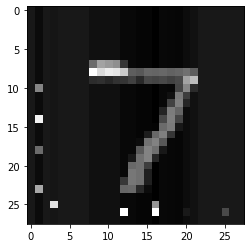

In [74]:
print(probs[0], " => ", preds[0])
plt.imshow(num_img.reshape(28,28,1), cmap=plt.cm.binary)
# plt.show()